In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C125P86ThinF_IMG_20151004_102053_cell_83.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C49P10thinF_IMG_20150724_102330_cell_160.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C49P10thinF_IMG_20150724_102843_cell_127.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C113P74ThinF_IMG_20150930_135904_cell_46.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C74P35_ThinF_IMG_20150815_114819_cell_13.png
/kaggle/input/files1/Malaria Cells/testing_set/Uninfected/C88P49ThinF_

In [1]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

import tensorflow_hub as hub

In [3]:
data_directory = pathlib.Path("/kaggle/input/files1/Malaria Cells/training_set")
class_names = [item.name for item in data_directory.glob('*')][:]
print(class_names)

['Uninfected', 'Parasitized']


In [4]:
data_dir="/kaggle/input/files1/Malaria Cells/training_set"

In [19]:
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [20]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [21]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 10))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()

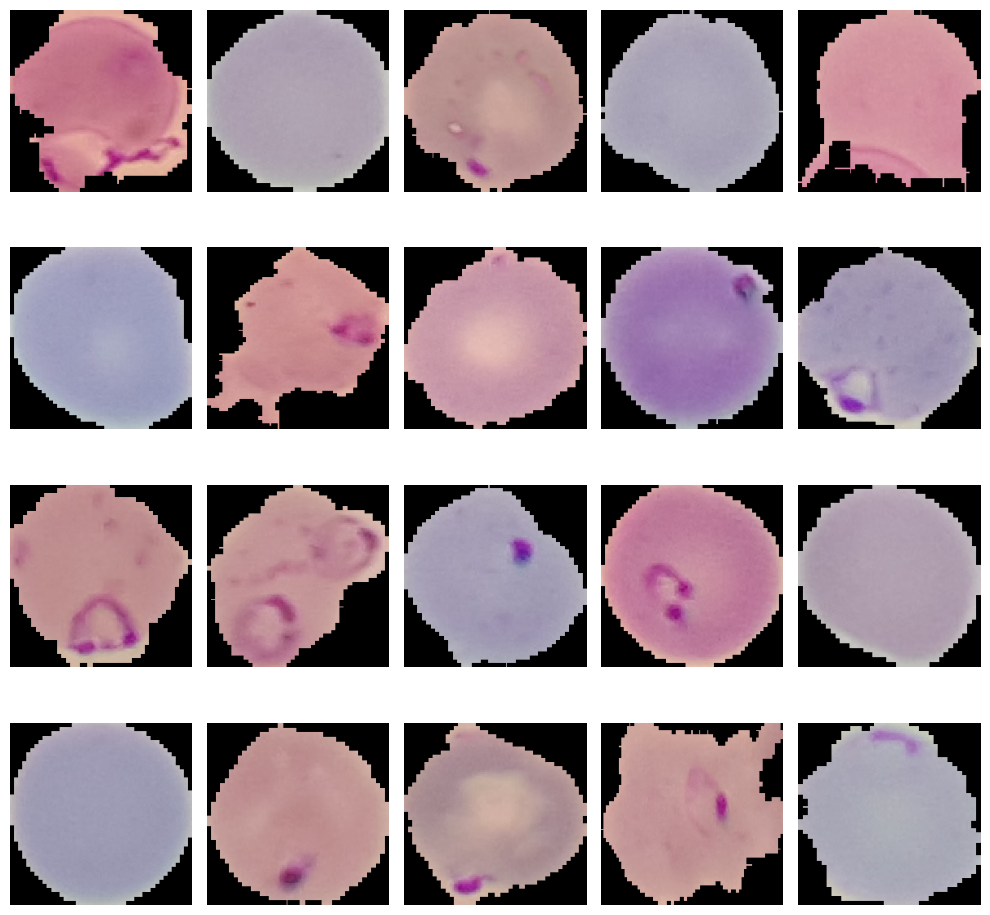

In [22]:
plot_random_images()

In [23]:
train_data, val_data

(<keras.preprocessing.image.DirectoryIterator at 0x7ecd1898ec20>,
 <keras.preprocessing.image.DirectoryIterator at 0x7ecd213174f0>)

In [24]:
model = tf.keras.Sequential([
            tf.keras.Input(shape = images[0].shape),
            tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
            tf.keras.layers.MaxPooling2D((2, 2), strides=2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation = 'relu'),
            tf.keras.layers.Dense(2, activation = 'softmax'),
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [26]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_acc', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [27]:
classifier = model.fit(train_data, batch_size = 32, 
                                 epochs = 12, 
                                 validation_data = val_data, 
                                 verbose = 1,
                                 callbacks = [reduce_lr])

Epoch 1/12
689/689 [==============================] - 113s 158ms/step - loss: 0.4781 - accuracy: 0.7969 - val_loss: 0.2745 - val_accuracy: 0.9096 - lr: 0.0010
Epoch 2/12
689/689 [==============================] - 59s 86ms/step - loss: 0.1944 - accuracy: 0.9331 - val_loss: 0.2060 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 3/12
689/689 [==============================] - 59s 85ms/step - loss: 0.1376 - accuracy: 0.9507 - val_loss: 0.2174 - val_accuracy: 0.9256 - lr: 0.0010
Epoch 4/12
689/689 [==============================] - 60s 87ms/step - loss: 0.0810 - accuracy: 0.9700 - val_loss: 0.3559 - val_accuracy: 0.9105 - lr: 0.0010
Epoch 5/12
689/689 [==============================] - 59s 86ms/step - loss: 0.0474 - accuracy: 0.9822 - val_loss: 0.4042 - val_accuracy: 0.9120 - lr: 0.0010
Epoch 6/12
689/689 [==============================] - 62s 90ms/step - loss: 0.0266 - accuracy: 0.9907 - val_loss: 0.4270 - val_accuracy: 0.9191 - lr: 0.0010
Epoch 7/12
689/689 [==============================] - 60

In [28]:
model.evaluate(val_data)

173/173 [==============================] - 12s 67ms/step - loss: 0.7608 - accuracy: 0.9109


[0.7607944011688232, 0.9108892679214478]

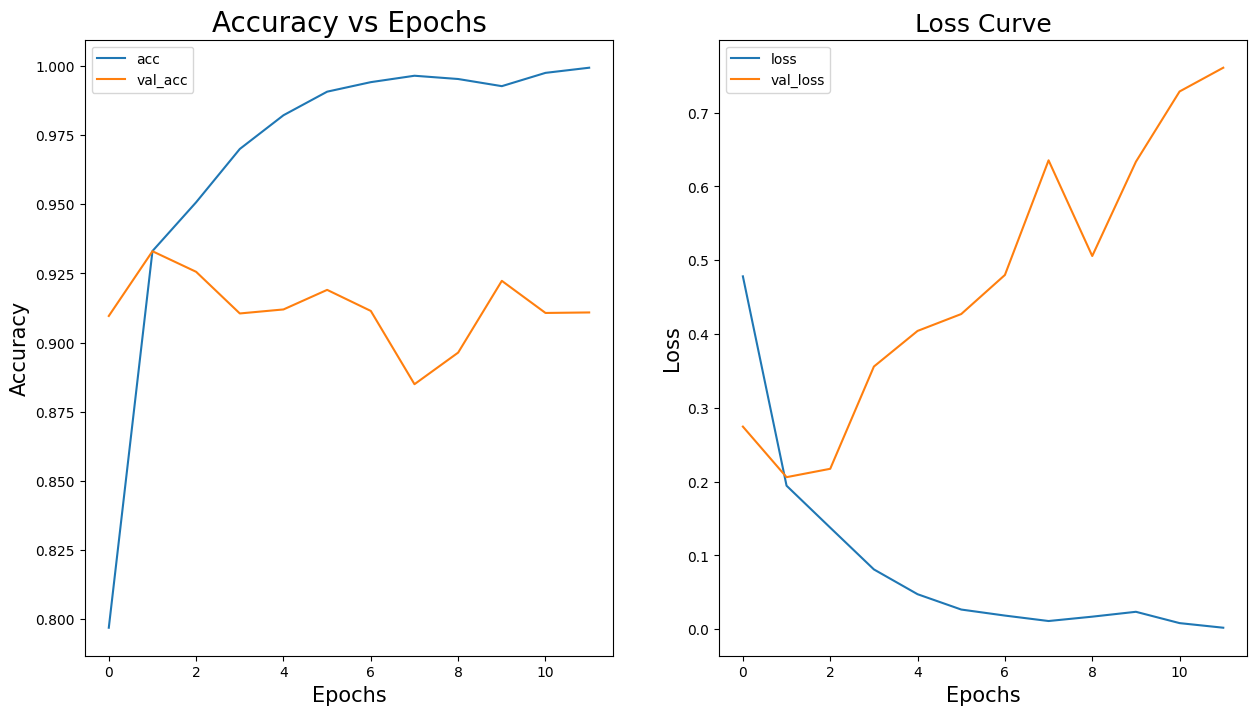

In [29]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, classifier.history['accuracy'], label = 'acc')
    axes[0].plot(classifier.epoch, classifier.history['val_accuracy'], label = 'val_acc')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, classifier.history['loss'], label = 'loss')
    axes[1].plot(classifier.epoch, classifier.history['val_loss'], label="val_loss")
    axes[1].set_title("Loss Curve",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

In [30]:
model.save('model.h5')

In [31]:
loaded_model = tf.keras.models.load_model('/kaggle/working/model.h5')

In [32]:
def preprocess_images(path):
    img = image.load_img(path, target_size=(224, 224))

    img_array = image.img_to_array(img)

    img_array = np.expand_dims(img_array, axis=0)

    img_preprocessed = img_array / 255.0
    
    return img_preprocessed

In [37]:
img_path = "/kaggle/input/files1/Malaria Cells/testing_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png"
img = preprocess_images(img_path)
prediction = loaded_model.predict(img)

predicted_class_index = np.argmax(prediction)

class_labels = ['Parasitized', 'Uninfected'] 
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class:", predicted_class_label)

1/1 [==============================] - 0s 21ms/step
Predicted class: Parasitized
